# Proyecto ML

## Instaladores

Parece ser que va a tocar instalar las librerías cada vez.

In [1]:
%pip install ultralytics
%pip install opencv-python
%pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 118.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


## Importación de librerías

Y enlace al drive en el que se guardarán el notebook, modelos, datasets, etc.

In [1]:
# Herramientas de tratamiento de datos
import numpy as np

# Herramientas de computer vision
import cv2
import ultralytics
from ultralytics import YOLO
from roboflow import Roboflow

import torch

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga del modelo preentrenado YOLOv8 Medium

In [4]:
ultralytics.checks()

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.4/112.6 GB disk)


In [2]:
modelo = YOLO('yolov8m.pt')

## Comprobación básica

Imprimir la imagen en pantalla con objetos detectados.

In [5]:
ruta_inicial = "/content/drive/MyDrive/ML_The_Bridge"
ruta_pruebas = "/content/drive/MyDrive/ML_The_Bridge/imagenes"
ruta_modelos = "/content/drive/MyDrive/ML_The_Bridge/modelos"

In [7]:
def comprobacion_inicial(ruta_imagen):
    imagen = modelo(ruta_imagen)
    imagen[0].show()

#comprobacion_inicial(f"{ruta_pruebas}/prueba_2.jpg")

In [20]:
comprobacion_inicial(r"C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg")


image 1/1 C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg: 640x384 1 person, 1 car, 1 truck, 215.0ms
Speed: 1.8ms preprocess, 215.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


## Carga de un primer dataset

Dataset de señales de tráfico en Europa, descargado de RoboFlow Universe.  
Enlace: https://universe.roboflow.com/radu-oprea-r4xnm/traffic-signs-detection-europe   
Descargado sin entrenar para entrenarlo yo.  
Todo comentado porque ya está descargado y guardado en el Drive del proyecto.

In [ ]:
'''
rf = Roboflow(api_key="hCNbQPHCydCak3y2BI1B")
project = rf.workspace("radu-oprea-r4xnm").project("traffic-signs-detection-europe")
version = project.version(11)
dataset = version.download("yolov8")

print(dataset.location)

!cp -r "{dataset.location}" "/content/drive/MyDrive/ML_The_Bridge/datasets/"
'''

'\nrf = Roboflow(api_key="hCNbQPHCydCak3y2BI1B")\nproject = rf.workspace("radu-oprea-r4xnm").project("traffic-signs-detection-europe")\nversion = project.version(11)\ndataset = version.download("yolov8")\n\nprint(dataset.location)\n\n!cp -r "{dataset.location}" "/content/drive/MyDrive/ML_The_Bridge/datasets/"\n'

## Entrenamiento del modelo

Primer dataset para detectar señales.  
Comentado porque ya está entrenado.

In [8]:
ruta_signs = "/content/drive/MyDrive/ML_The_Bridge/datasets/Traffic-Signs-Detection-Europe-11"

In [ ]:
'''
modelo.train(
    data=f"{ruta_signs}/data.yaml",
    epochs=50,
    imgsz=512,
    batch=4,
    cache=False
)
'''

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/ML_The_Bridge/datasets/Traffic-Signs-Detection-Europe-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d284833c770>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,   

## Guardado del modelo para señales

Y comprobación de funcionamiento.  
Este modelo detecta mejor las señales de stop que el COCO nativo de YOLOv8m (creo vamos).

In [ ]:
#!cp /content/runs/detect/train/weights/best.pt "/content/drive/MyDrive/ML_The_Bridge/modelos/best_signs.pt"

In [3]:
#modelo_signs = YOLO(f"{ruta_modelos}/best_signs.pt")
modelo_signs = YOLO(r"C:\Users\adria\Bootcamp\ML_The_Bridge\modelos\best_signs.pt")

In [4]:
def comprobacion_signs(ruta_imagen):
    imagen = modelo_signs(ruta_imagen)
    imagen[0].show()

In [15]:
comprobacion_signs(f"{ruta_pruebas}/prueba_1.jpg")

NameError: name 'ruta_pruebas' is not defined

In [23]:
#comprobacion_signs(f"{ruta_pruebas}/prueba_2.jpg")
comprobacion_signs(r"C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg")


image 1/1 C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg: 512x320 1 forb_left, 161.4ms
Speed: 1.7ms preprocess, 161.4ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 320)


## Combinamos los dos modelos entrenados

YOLOv8m y Traffic Signs Detection Europe 11.  
Esta sería la base de 'apilar' modelos entrenados para detectar distintos objetos a la vez.

In [ ]:
#modelo_coches = YOLO("yolov8m.pt")
#modelo_signs = YOLO(f"{ruta_modelos}/best_signs.pt")

In [10]:
#detec_1 = modelo(f"{ruta_pruebas}/prueba_2.jpg")
#detec_2 = modelo_signs(f"{ruta_pruebas}/prueba_2.jpg")

detec_1 = modelo(r"C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg")
detec_2 = modelo_signs(r"C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg")


image 1/1 C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg: 640x384 1 person, 1 car, 1 truck, 210.6ms
Speed: 1.8ms preprocess, 210.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg: 512x320 1 forb_left, 144.2ms
Speed: 2.3ms preprocess, 144.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 320)


Aquí abrimos una lista de detecciones vacía y añadimos las detecciones de cada modelo.  
El bucle if lo que hace es ignorar las detecciones de señales de stop

In [11]:
detec_total = []

for box in detec_1[0].boxes:
  if detec_1[0].names[box.cls[0].item()] == "stop sign":
    continue  # ignoramos
  detec_total.append(("coche", box))

for box in detec_2[0].boxes:
    detec_total.append(("senal", box))

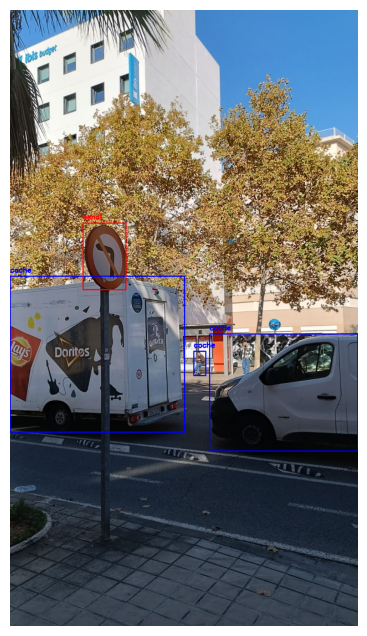

In [14]:
import cv2

# Cargar la imagen original
#img = cv2.imread(f"{ruta_pruebas}/prueba_2.jpg")
img = cv2.imread(r"C:\Users\adria\Bootcamp\ML_The_Bridge\imagenes\prueba_1.jpg")

color_coche = (255, 0, 0)   # Azul
color_senal = (0, 0, 255)   # Rojo

for tipo, box in detec_total:
    # Coordenadas del bounding box
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

    # Elige color según tipo
    color = color_coche if tipo == "coche" else color_senal

    # Dibujar rectángulo
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    # Texto
    cv2.putText(
        img,
        tipo,
        (x1, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        color,
        2
    )

# CSV
#cv2.imshow("Detecciones", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Colab
#from google.colab.patches import cv2_imshow
#cv2_imshow(img)

# Si falla
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Guardar si quieres
#cv2.imwrite("resultado.jpg", img)

### Descarto este notebook

Porque "apilar" modelos en vez de combinarlos no me parece tan útil ni escalable, sobre todo cuando quiera analizar vídeos en vez de imágenes.  
Paso a otro notebook donde cree un solo modelo con los distintos objetos que me interesen combinando datasets.